In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon-stats-gen-1-9/PokemonStats.csv


In [2]:
pokemon_data = pd.read_csv("/kaggle/input/pokemon-stats-gen-1-9/PokemonStats.csv")

In [3]:
#Display the first few rows
pokemon_data.head()

,ID,Name,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Type1,Type2,Height,Weight
0,1,Bulbasaur,318,45,49,49,65,65,45,Grass,Poison,0.7,6.9
1,2,Ivysaur,405,60,62,63,80,80,60,Grass,Poison,1.0,13.0
2,3,Venusaur,525,80,82,83,100,100,80,Grass,Poison,2.0,100.0
3,3,Venusaur Mega Venusaur,625,80,100,123,122,120,80,Grass,Poison,2.4,155.5
4,4,Charmander,309,39,52,43,60,50,65,Fire,NaN,0.6,8.5


In [4]:
pokemon_data.tail()

,ID,Name,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Type1,Type2,Height,Weight
1189,1006,Iron Valiant,590,74,130,90,120,60,116,Fairy,Fighting,1.4,35.0
1190,1007,Koraidon,670,100,135,115,85,100,135,Fighting,Dragon,2.5,303.0
1191,1008,Miraidon,670,100,85,100,135,115,135,Electric,Dragon,3.5,240.0
1192,1009,Walking Wake,590,99,83,91,125,83,109,Water,Dragon,3.5,280.0
1193,1010,Iron Leaves,590,90,130,88,70,108,104,Grass,Psychic,1.5,125.0


In [5]:
# Overview of data types and missing values
print(pokemon_data.info())

# Summary statistics of numerical columns
print(pokemon_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1194 non-null   int64  
 1   Name     1194 non-null   object 
 2   Total    1194 non-null   int64  
 3   HP       1194 non-null   int64  
 4   Attack   1194 non-null   int64  
 5   Defense  1194 non-null   int64  
 6   SpAtk    1194 non-null   int64  
 7   SpDef    1194 non-null   int64  
 8   Speed    1194 non-null   int64  
 9   Type1    1194 non-null   object 
 10  Type2    652 non-null    object 
 11  Height   1194 non-null   float64
 12  Weight   1193 non-null   float64
dtypes: float64(2), int64(8), object(3)
memory usage: 121.4+ KB
None
                ID        Total           HP       Attack      Defense  \
count  1194.000000  1194.000000  1194.000000  1194.000000  1194.000000   
mean    492.746231   441.206868    70.883585    80.948911    74.587102   
std     293.719541   121.015326 

In [6]:
# Handling missing values in 'Type2'
pokemon_data['Type2'].fillna('None', inplace=True)

In [7]:
# Checking for duplicate rows
duplicate_rows = pokemon_data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Removing duplicate rows
pokemon_data = pokemon_data[~duplicate_rows]


Number of duplicate rows: 0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


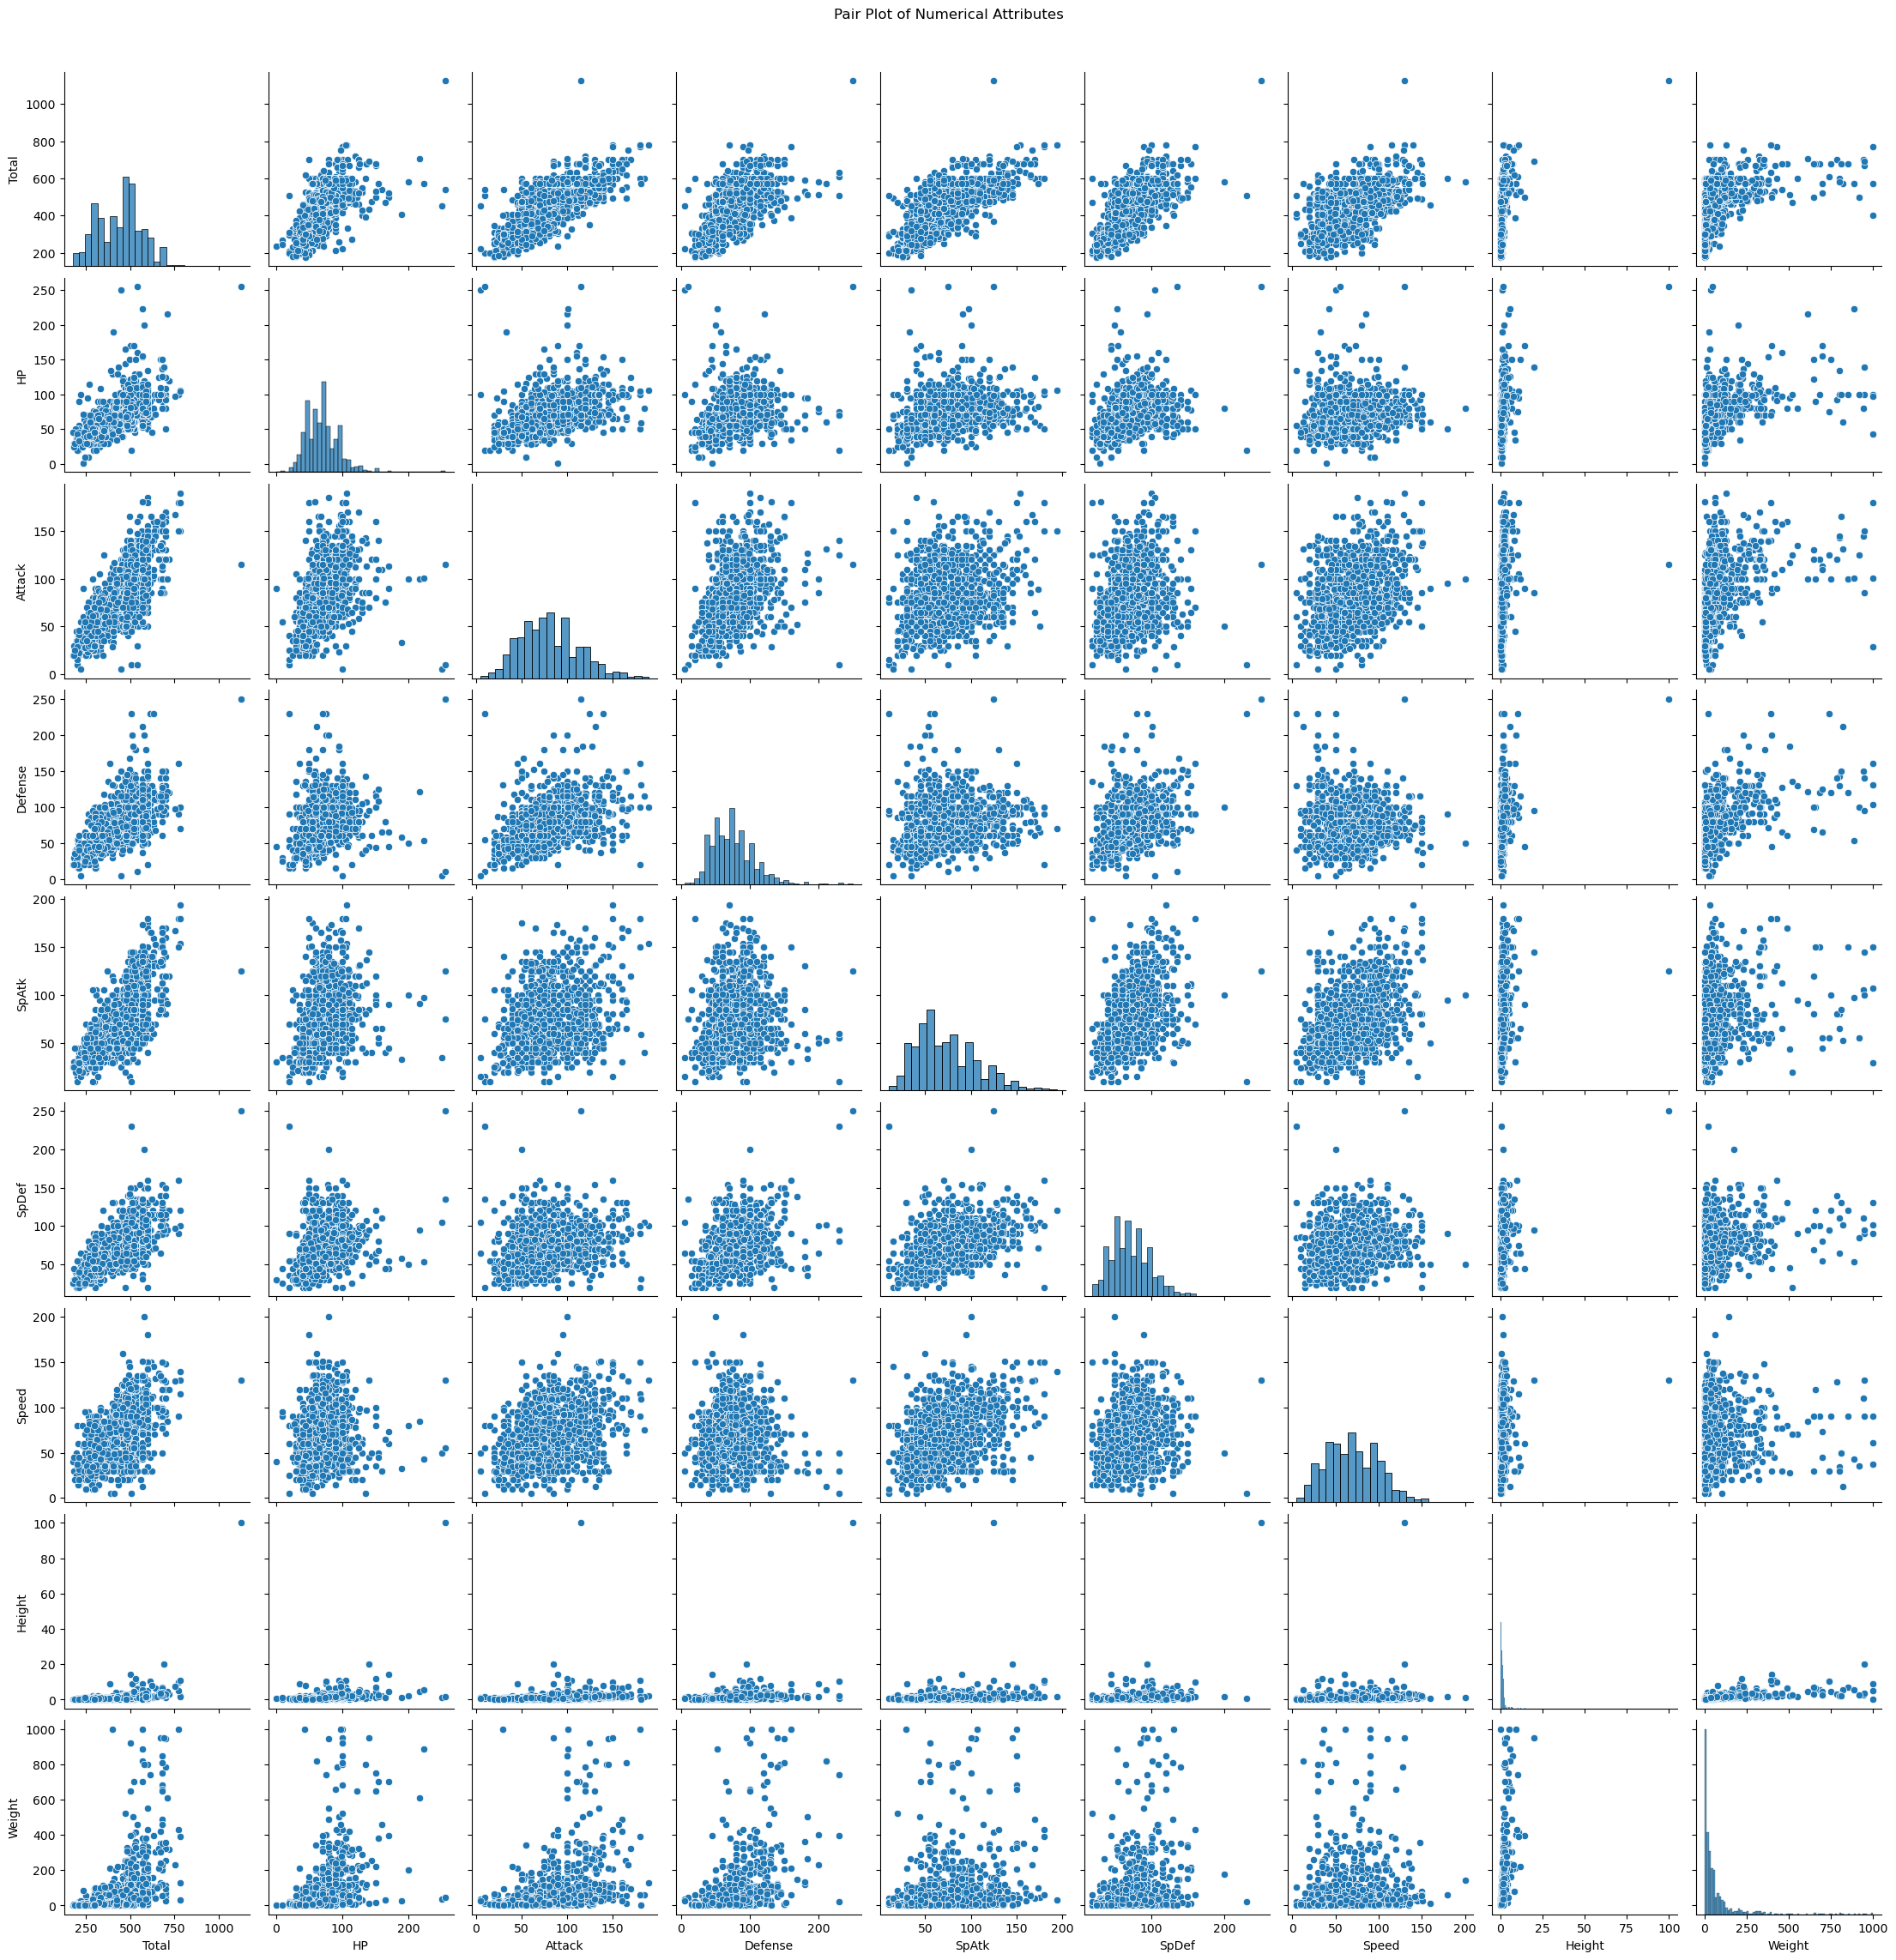

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for the pair plot
numerical_columns = ['Total', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Height', 'Weight']

# Creating a pair plot
sns.pairplot(pokemon_data[numerical_columns])
plt.suptitle("Pair Plot of Numerical Attributes", y=1.02)
plt.show()


In [9]:
pip install numpy==1.16.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2823 lines of output]
      Running from numpy source directory.
      /tmp/pip-install-tfi8wb3n/numpy_c14b9ca3e74f421687d6effcad593dd1/numpy/distutils/misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      customize UnixCCompiler
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
          include_dirs = ['/usr/local/include', '/usr/include', '/opt/conda/include']
      
        FOUND:
          libraries = ['mkl_rt', 'pthread']
          library_dirs = ['/opt/conda/lib']
          define_macro

In [10]:
pip install --upgrade scipy


Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


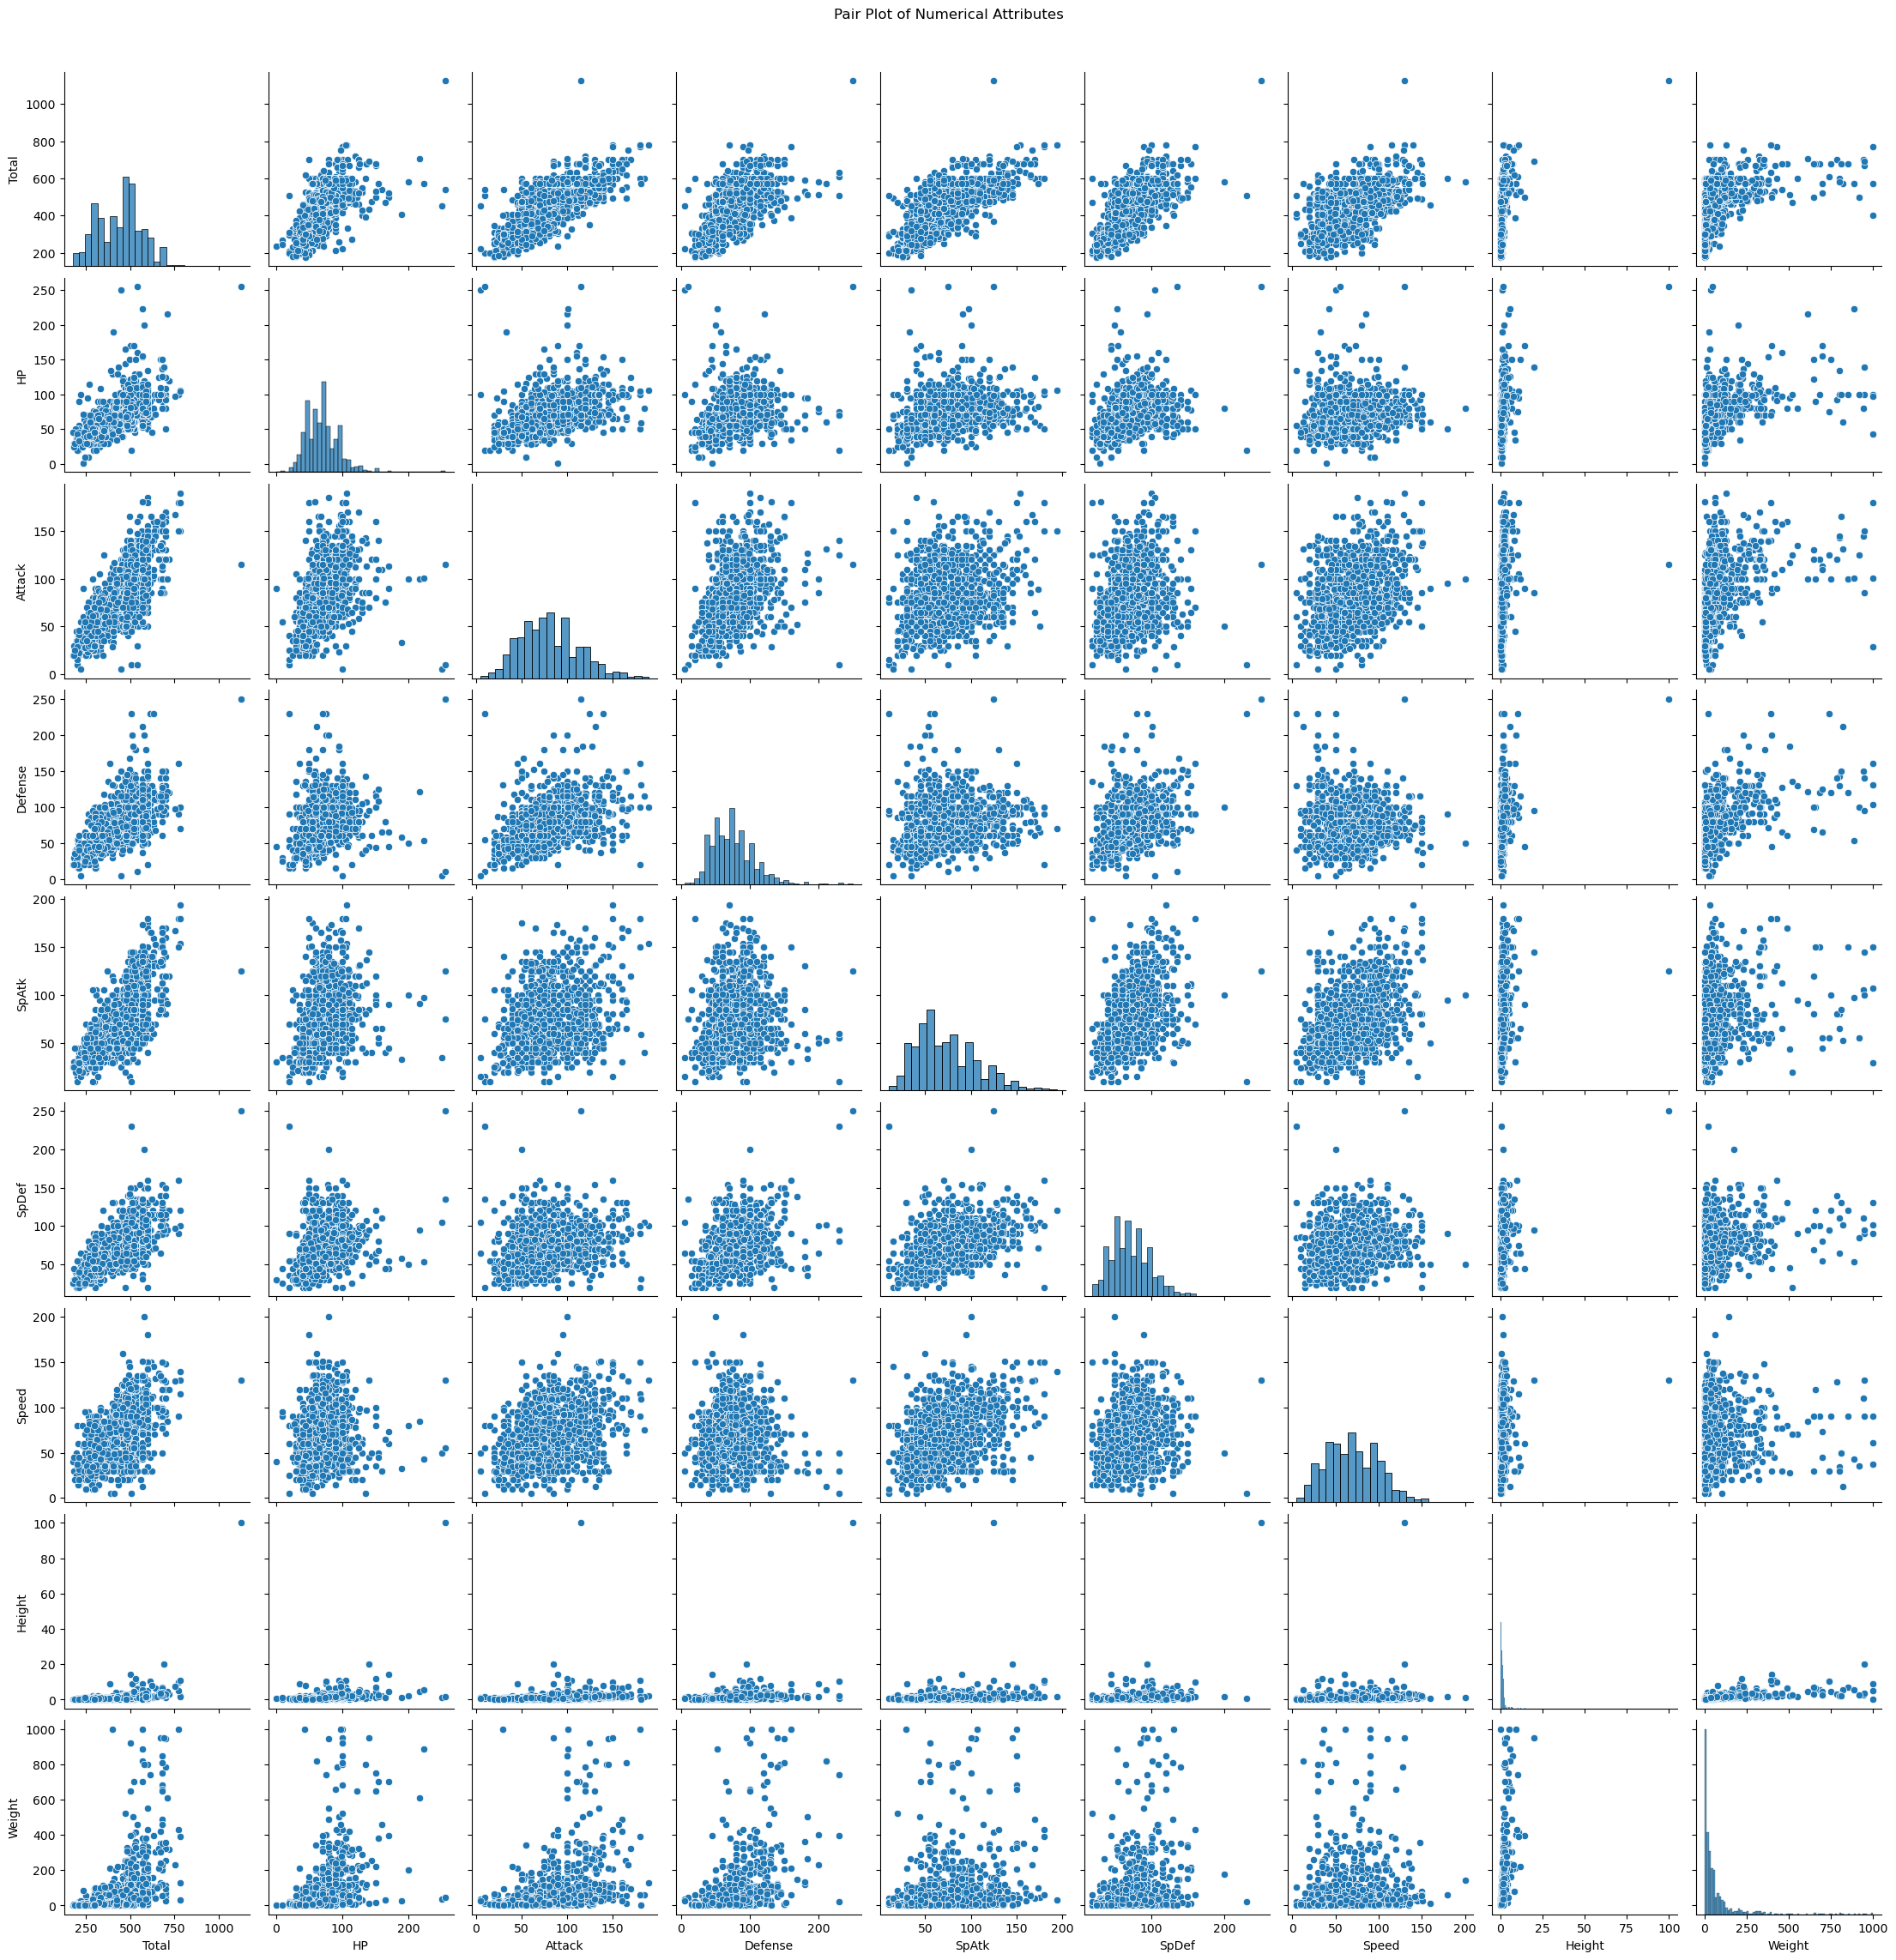

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for the pair plot
numerical_columns = ['Total', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Height', 'Weight']

# Creating a pair plot
sns.pairplot(pokemon_data[numerical_columns])
plt.suptitle("Pair Plot of Numerical Attributes", y=1.02)
plt.show()


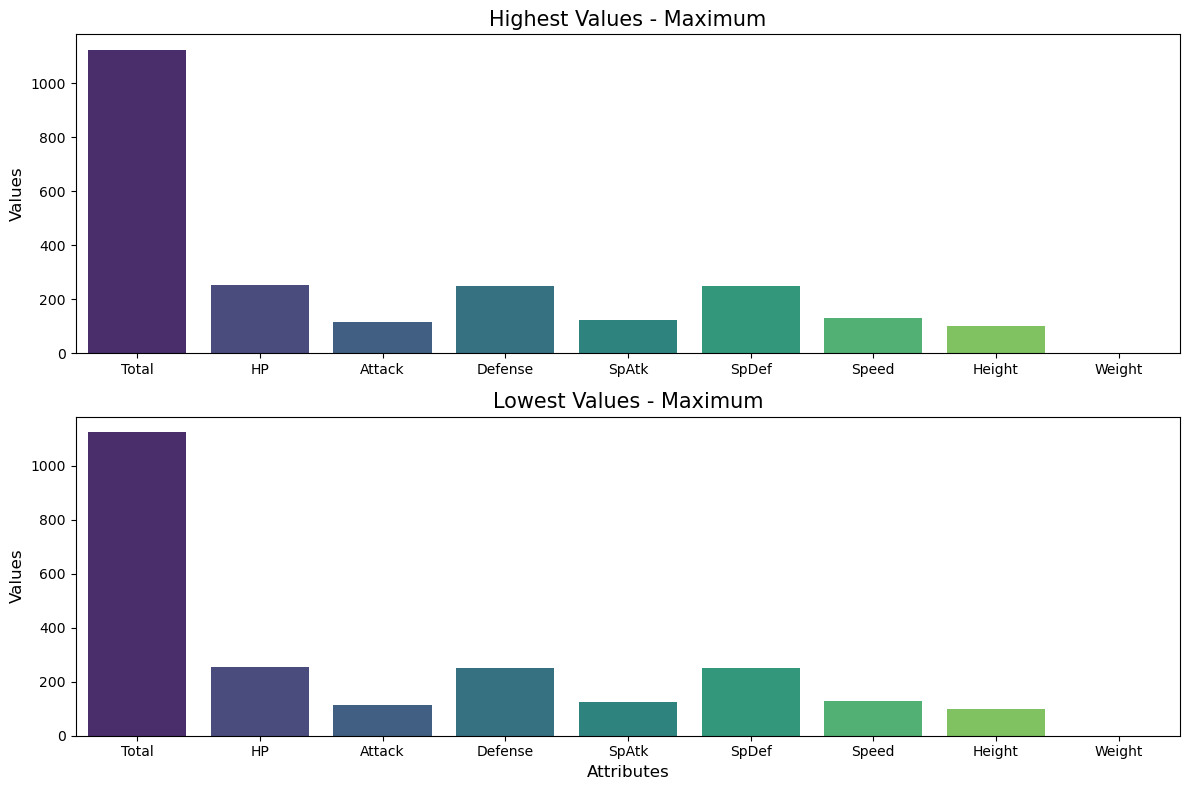

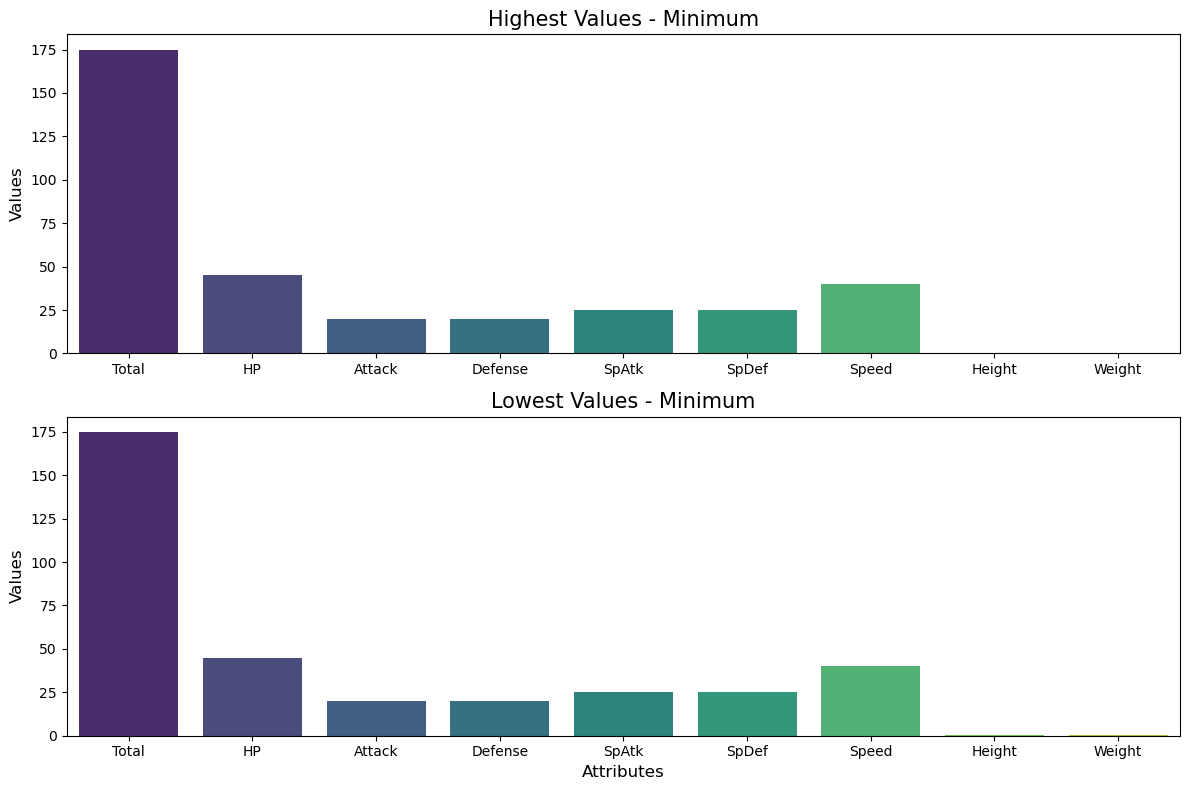

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns for visualization
numeric_columns = ['Total', 'HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed', 'Height', 'Weight']

# Function to create bar plots for highest and lowest values
def plot_highest_lowest(data, title):
    plt.figure(figsize=(12, 8))
    
    # Create subplots
    plt.subplot(2, 1, 1)
    sns.barplot(x=numeric_columns, y=data[numeric_columns].values[0], palette='viridis')
    plt.title(f'Highest Values - {title}', fontsize=15)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.subplot(2, 1, 2)
    sns.barplot(x=numeric_columns, y=data[numeric_columns].values[0], palette='viridis')
    plt.title(f'Lowest Values - {title}', fontsize=15)
    plt.xlabel('Attributes', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Calculate highest and lowest values for each column
highest_values = pokemon_data.nlargest(1, numeric_columns)
lowest_values = pokemon_data.nsmallest(1, numeric_columns)

# Plot highest and lowest values
plot_highest_lowest(highest_values, 'Maximum')
plot_highest_lowest(lowest_values, 'Minimum')


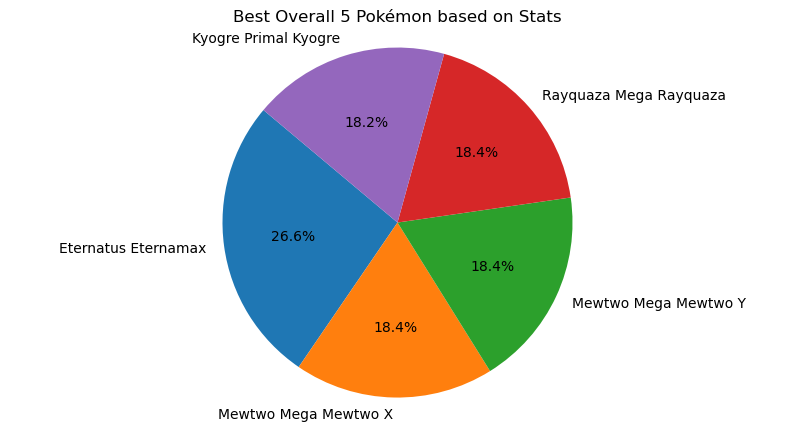

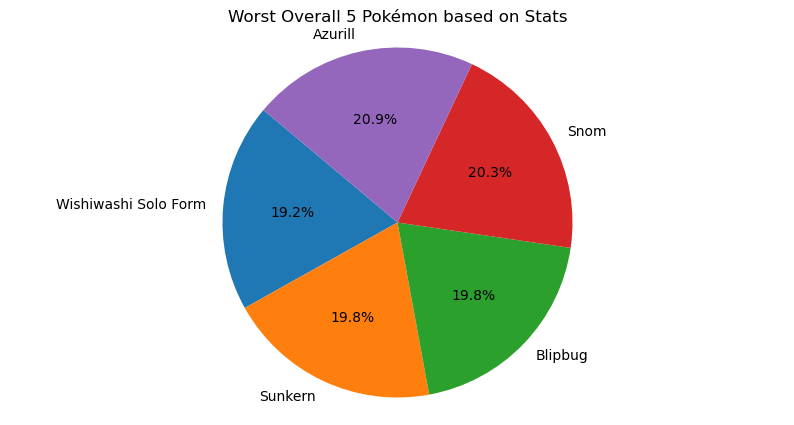

In [13]:
import matplotlib.pyplot as plt

# Sort the data by Total to get the best and worst Pokémon
best_pokemon = pokemon_data.nlargest(5, 'Total')
worst_pokemon = pokemon_data.nsmallest(5, 'Total')

# Create a pie chart for best overall 5 Pokémon
plt.figure(figsize=(10, 5))
plt.pie(best_pokemon['Total'], labels=best_pokemon['Name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Best Overall 5 Pokémon based on Stats')
plt.show()

# Create a pie chart for worst overall 5 Pokémon
plt.figure(figsize=(10, 5))
plt.pie(worst_pokemon['Total'], labels=worst_pokemon['Name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Worst Overall 5 Pokémon based on Stats')
plt.show()


/tmp/ipykernel_23/1511072462.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = pokemon_data.corr()


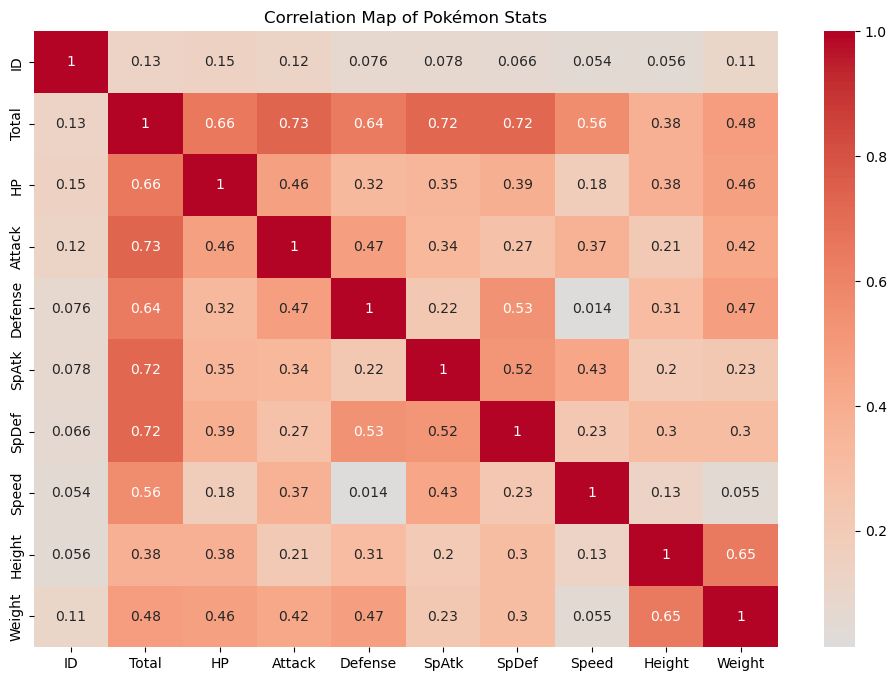

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = pokemon_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Map of Pokémon Stats')
plt.show()